In [1]:
# import library
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [2]:
# memuat data
data = pd.read_csv("heart.csv")
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
# memilih data yang dibutuhkan
X = data.iloc[:,0:20]  #independent colums
y = data.iloc[:,-1]    # target colum i.e price range

In [4]:
# menerapkan SelectKBest untuk melakukan ekstraksi
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [5]:
# menggabungkan 2 dataframe
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Age','creatinine_phosphokinase']  #naming the dataframe columns
print(featureScores.nlargest(10,'creatinine_phosphokinase'))  #print 10 best features

                         Age  creatinine_phosphokinase
6                  platelets              26135.771990
11                      time               3826.892661
2   creatinine_phosphokinase               1897.314839
12               DEATH_EVENT                203.000000
4          ejection_fraction                 79.072541
0                        age                 44.619455
7           serum_creatinine                 19.814118
8               serum_sodium                  1.618175
5        high_blood_pressure                  1.221539
1                    anaemia                  0.746593


In [6]:
# import library
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

In [7]:
# memuat data
data = pd.read_csv("heart.csv")
X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range

In [8]:
# melakukan ExtraTreesClassifier untuk mengekstraksi fitur
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.01804196 0.00317439 0.01218021 0.00438266 0.03286938 0.00359803
 0.007295   0.02272921 0.01307312 0.00378506 0.00415157 0.10335729
 0.77136211]


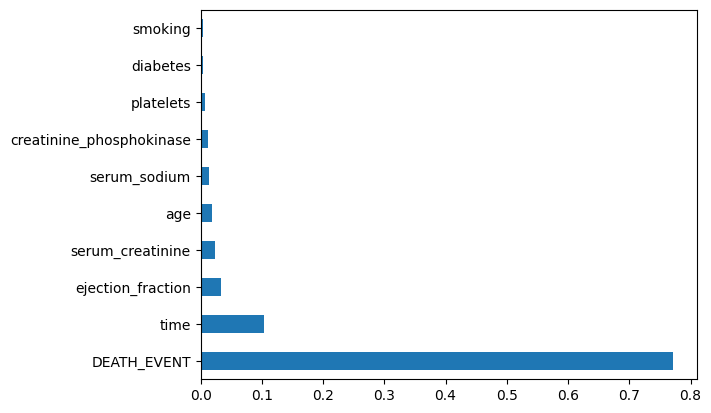

In [9]:
# melakukan plot dari feature importances
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [10]:
# import library
import pandas as pd
import numpy as np
import seaborn as sns

In [11]:
# memuat data
data = pd.read_csv("heart.csv")
X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range

In [12]:
# mendapatkan  correlations dari setiap fitur dalam dataset
corrmat = data.corr()
top_corr_features = corrmat.index

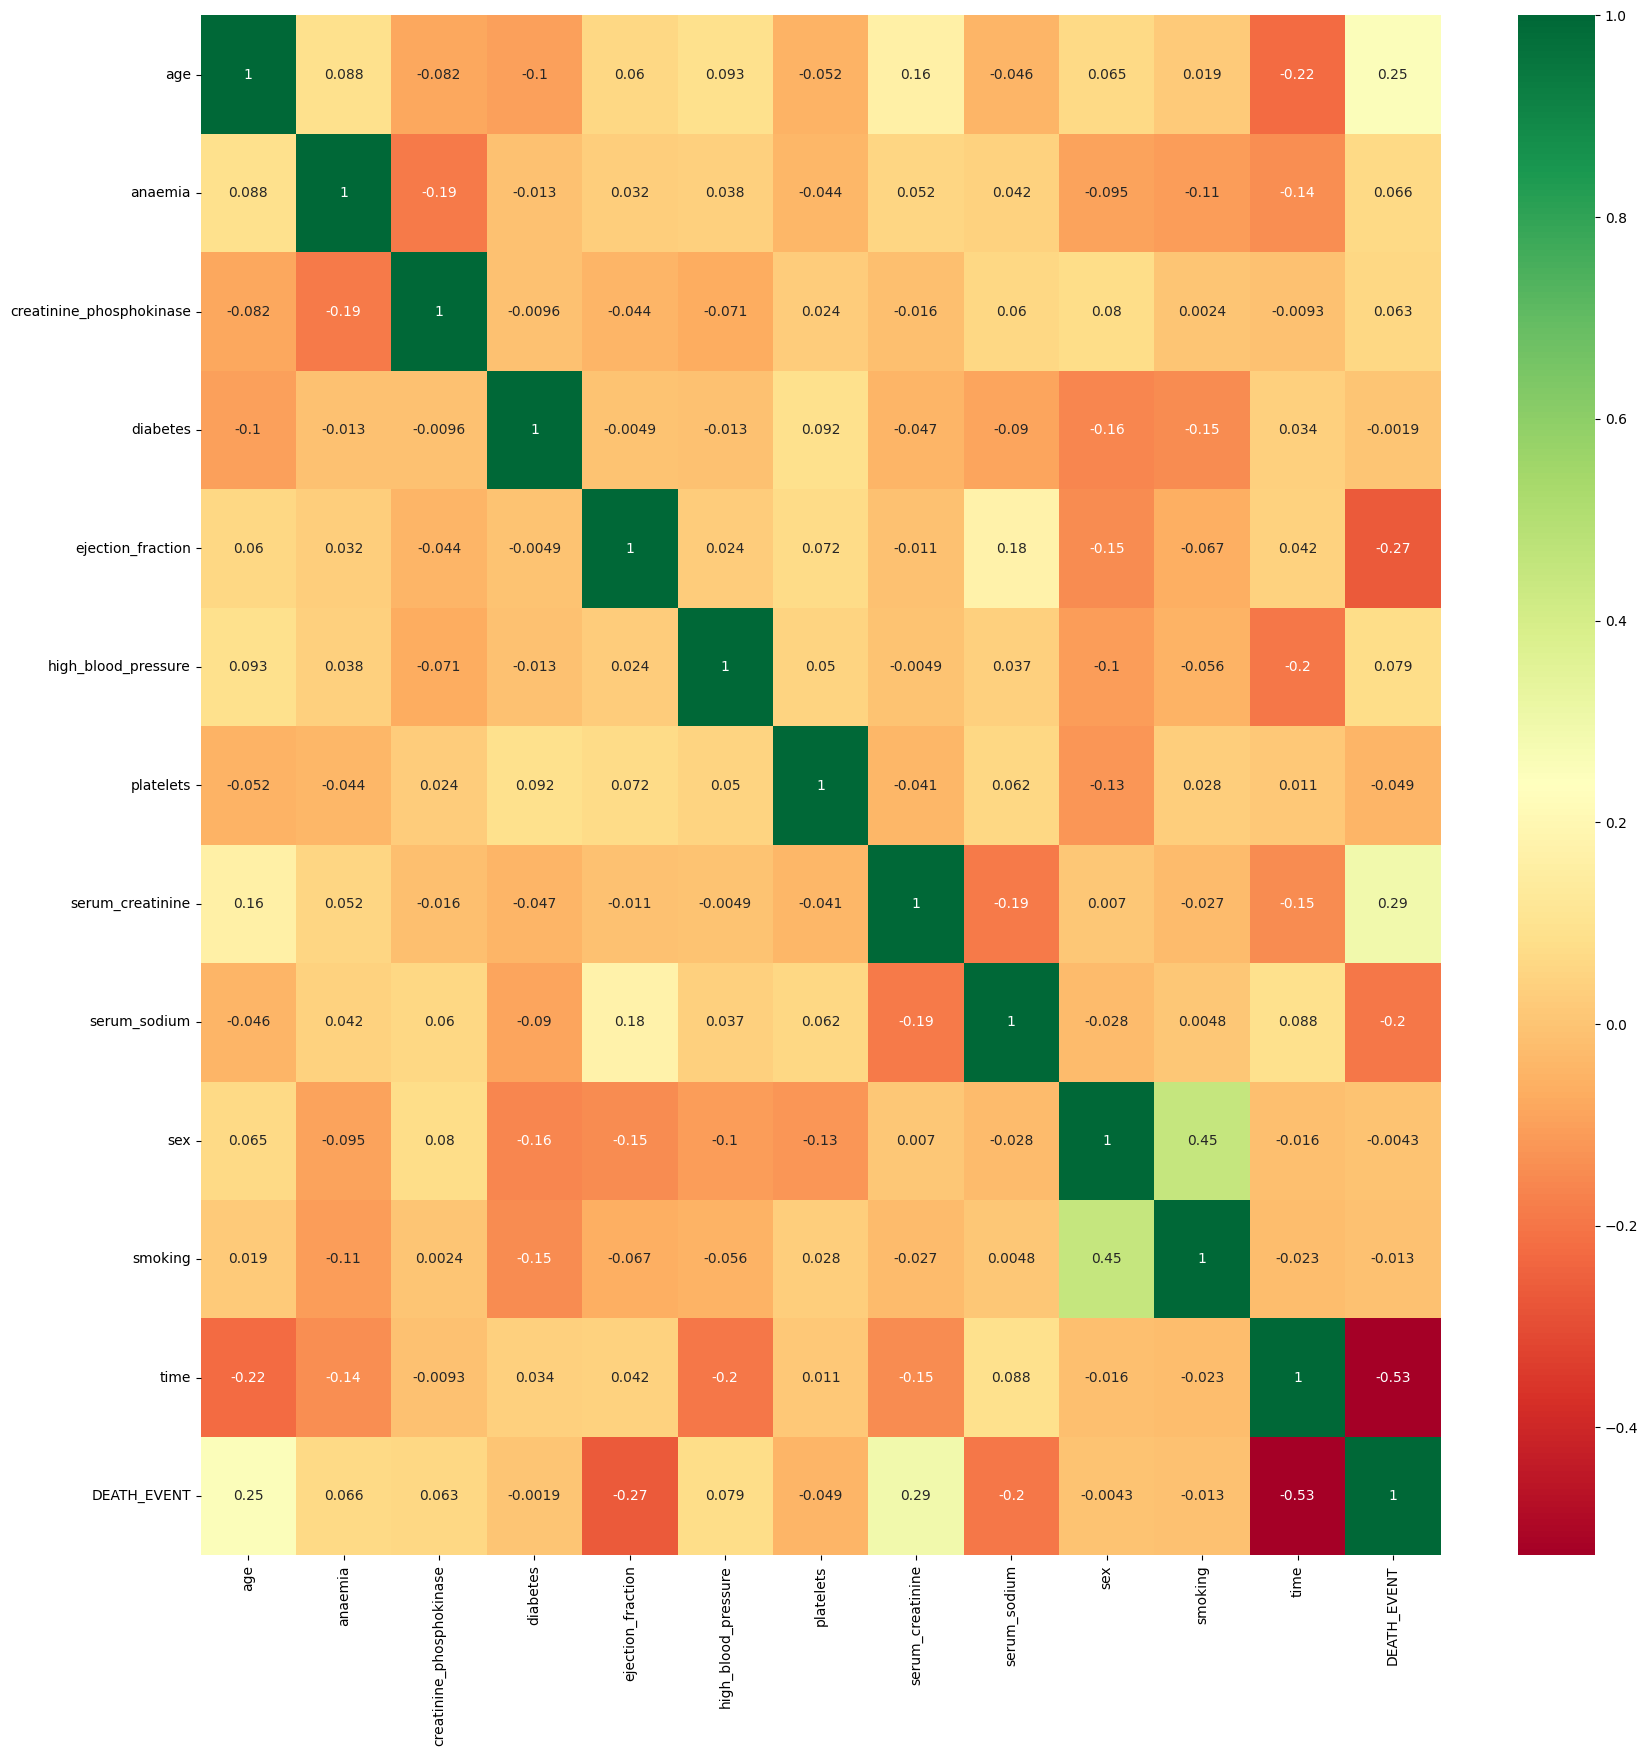

In [13]:
# plot heatmap
plt.figure(figsize=(20,20))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

KESIMPULAN
* lihat pada baris smoking, korelasinya dengan sex yang mempunyai relasi kuat yang ditandai dengan angka yang menghampiri angka 1 dan mendekati warna hijau yang berarti relasinya kuat

* sedangkan untuk DEATH_EVENT dengan time berkorelasi lemah yang ditandai dengan angka korelasinya minus dan warnanya merah

